In [501]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Подготовка данных и визуализация

Скачаем данные.

In [862]:
mosprime = pd.read_csv('mosprime.csv', sep=';', encoding = 'CP1251')

In [863]:
mosprime.head()

,Date,ON,1W,2W,1M,2M,3M,6M
0,22.12.2017,7.89,7.91,7.91,7.9,7.92,7.9,7.87
1,21.12.2017,7.88,7.91,7.91,7.9,7.92,7.89,7.87
2,20.12.2017,7.9,7.91,7.91,7.9,7.9,7.87,7.87
3,19.12.2017,7.93,7.91,7.91,7.9,7.9,7.88,7.88
4,18.12.2017,7.92,7.96,7.99,7.95,7.98,7.96,7.96


Добавим дату в качестве индекса и оставим только трехмесячные ставки.

In [864]:
mosprime.index = np.array([datetime.strptime(i, '%d.%m.%Y') for i in  mosprime.Date])

In [865]:
mosprime3m = mosprime['3M']

Конвертируем в числовой формат.

In [866]:
mosprime3m = mosprime3m.convert_objects(convert_numeric=True)

In [867]:
mosprime3m.head()

2017-12-22    7.90
2017-12-21    7.89
2017-12-20    7.87
2017-12-19    7.88
2017-12-18    7.96
Name: 3M, dtype: float64

Найдем число пропущенных значений. Посмотрим, в какие дни они были.

In [8]:
np.sum(mosprime3m.isnull())

9

In [9]:
mosprime3m[mosprime3m.isnull()]

2016-03-07   NaN
2016-02-22   NaN
2016-01-06   NaN
2016-01-05   NaN
2015-01-09   NaN
2015-01-08   NaN
2015-01-06   NaN
2011-09-29   NaN
2008-08-21   NaN
Name: 3M, dtype: float64

Кроме того, для некоторых дней просто нет данных, посмотрим, сколько всего таких дней и как они распределены:

In [10]:
da = pd.date_range(start = mosprime3m.index[-1], end = mosprime3m.index[0], freq='d')

In [11]:
len(da)-len(mosprime3m)

1271

In [12]:
dummy_date = np.array([ 1 if i in mosprime3m.index else 0 for i in da])

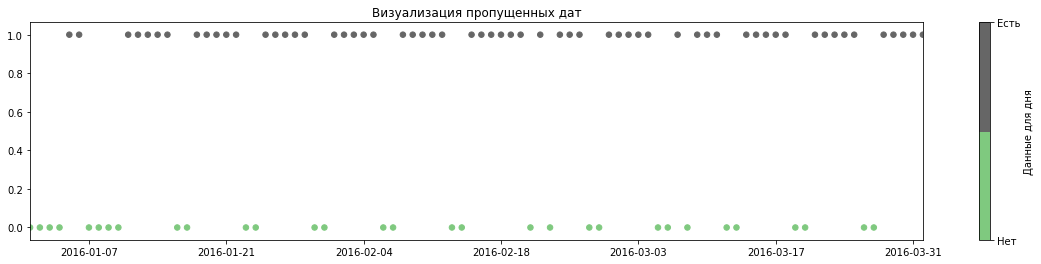

In [13]:
plt.figure(figsize=[20,4])
sp = plt.scatter(da, dummy_date, c = dummy_date,  cmap=plt.cm.get_cmap('Accent', 2) ,
                 alpha = 2,  s = 30, label = 'sd')
plt.xlim(['2016-01-01', '2016-04-01'])
plt.title('Визуализация пропущенных дат')
cb = plt.colorbar(sp)
cb.set_ticks([0,1])
cb.set_ticklabels(["Нет", "Есть"])
cb.set_label(r'Данные для дня')
plt.show()

Можно также посмотреть на то, для какого дня недели отсутствуют данные.

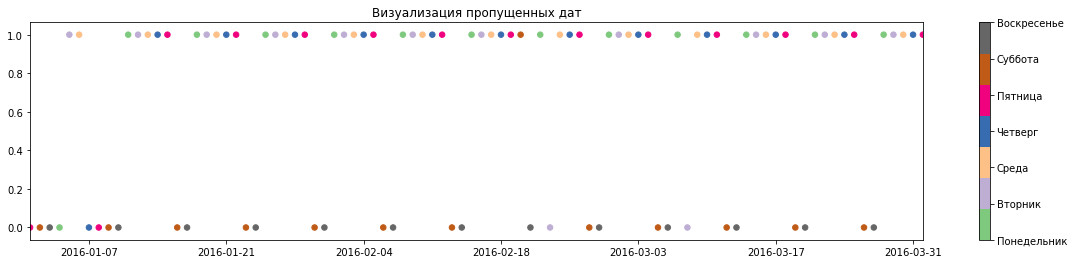

In [14]:
plt.figure(figsize=[20,4])
sp = plt.scatter(da, dummy_date, c = da.dayofweek, cmap=plt.cm.get_cmap('Accent', 7),
                 alpha = 2, s = 30, label = 'sd')
plt.xlim(['2016-01-01', '2016-04-01'])
plt.title('Визуализация пропущенных дат')
cb = plt.colorbar(sp)
cb.set_ticks([0,1,2,3,4,5,6])
cb.set_ticklabels(["Понедельник", "Вторник","Среда","Четверг","Пятница","Суббота","Воскресенье",])
plt.show()

Вполне ожидаемо, что это оказались выходные и праздничные дни.

Наш временной ряд выглядит следующим образом:

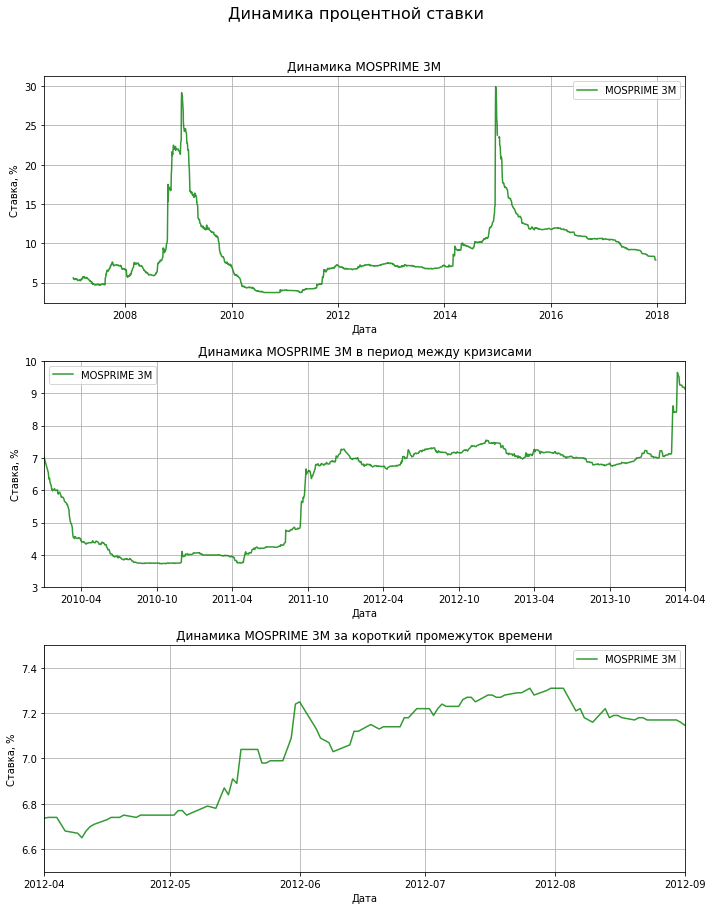

In [753]:
plt.figure(figsize=[10,12])
plt.subplot(3,1,1)
plt.plot(mosprime3m , 'g-',  alpha = 0.8, label = 'MOSPRIME 3M')
plt.title('Динамика MOSPRIME 3M')
plt.xlabel('Дата') 
plt.ylabel('Ставка, %')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(mosprime3m , 'g-',  alpha = 0.8, label = 'MOSPRIME 3M')
plt.xlim(['2010-01-01', '2014-04-01'])
plt.ylim([3,10])
plt.title('Динамика MOSPRIME 3M в период между кризисами')
plt.xlabel('Дата') 
plt.ylabel('Ставка, %')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(mosprime3m , 'g-',  alpha = 0.8, label = 'MOSPRIME 3M')
plt.xlim(['2012-04-01', '2012-09-01'])
plt.ylim([6.5,7.5])
plt.title('Динамика MOSPRIME 3M за короткий промежуток времени')
plt.xlabel('Дата') 
plt.ylabel('Ставка, %')
plt.legend()
plt.grid()

plt.suptitle('Динамика процентной ставки' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

Вид графиков, а в особенности два пика, позволяют сделать предварительное заключение о необходимости отдельной калибровки для кризисных и обычных периодов.

In [912]:
mosprime3m_between = mosprime3m[np.array([ True if i in pd.date_range(start = '2010-04-01',
                                                                      end = '2013-04-01',
                                                                      freq='d') 
                                          else False for i in mosprime3m.index]
                                        )].sort_index(axis=0, ascending=True)
mosprime3m_between.dropna().to_csv('mosprime3m_between.csv',
                           header=None,
                           index_label=mosprime3m_between.index)

In [913]:
mosprime3m_short = mosprime3m[np.array([ True if i in pd.date_range(start = '2012-04-01',
                                                                      end = '2012-09-01',
                                                                      freq='d') 
                                          else False for i in mosprime3m.index]
                                        )].sort_index(axis=0, ascending=True)
mosprime3m_short.dropna().to_csv('mosprime3m_short.csv',
                           header=None,
                           index_label=mosprime3m_short.index)

In [914]:
mosprime3m.dropna().to_csv('mosprime3m.csv',
                           header=None,
                           index_label=mosprime3m.index
                          )

In [992]:
mosprime3m = pd.read_csv('mosprime3m.csv',header=None, index_col=0, names=['r3m'])
mosprime3m_between = pd.read_csv('mosprime3m_between.csv',header=None, index_col=0, names=['r3m'])
mosprime3m_short = pd.read_csv('mosprime3m_short.csv',header=None, index_col=0, names=['r3m'])

In [993]:
def dN(x, mu, sigma):
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / np.sqrt(2 * np.pi * sigma ** 2)
    return pdf

In [998]:
def return_histogram(data):
    index = data.index
    data = data.values
    plt.figure(figsize=(9, 5))
    x = np.linspace(np.min(data), np.max(data), 100)
    plt.hist(np.array(data), bins=50, normed=True)
    y = dN(x, np.mean(data), np.std(data))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('Ставка')
    plt.ylabel('Частота/вероятность')
    plt.title('Гистограмма распределения ставок за период с '
              +str(min(index))+' по '+ str(max(index)))
    plt.grid(True)
    plt.show()

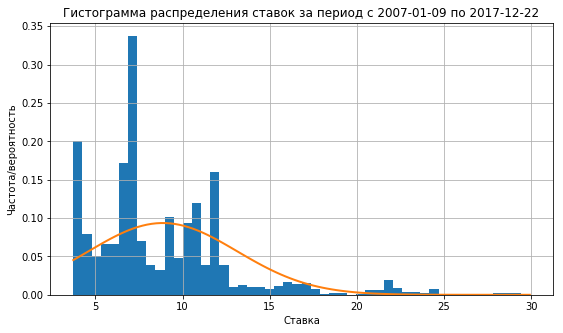

In [999]:
return_histogram(mosprime3m)

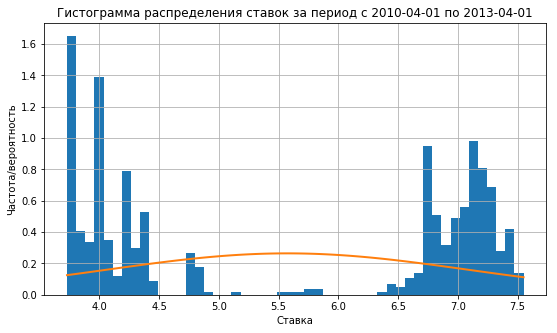

In [1001]:
return_histogram(mosprime3m_between)

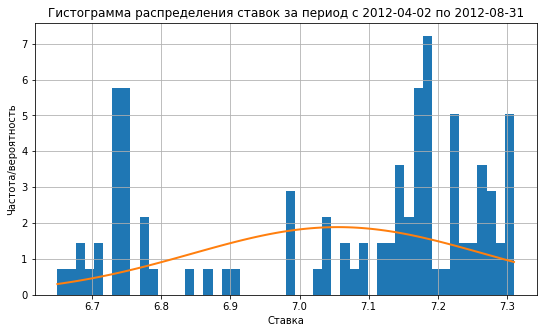

In [1002]:
return_histogram(mosprime3m_short)

In [820]:
def rolling_statistics(data):
    plt.figure(figsize=(11, 8))
    plt.subplot(311)
    mr = pd.rolling_mean(data, 21) * 21
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (21d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    plt.subplot(312)
    vo = pd.rolling_std(data, 21) * np.sqrt(21)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (21d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    plt.subplot(313)
    co = pd.rolling_corr(mr, vo, 252)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (21d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)
    plt.tight_layout()
    plt.suptitle('Месячные скользящие статистики', y=1.05, fontsize=16)
    plt.show()

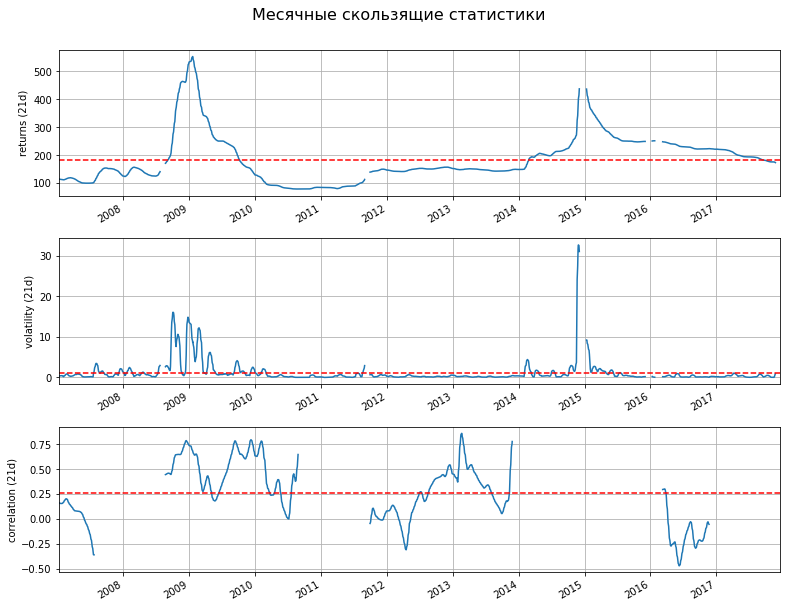

In [822]:
rolling_statistics(mosprime3m)